<a href="https://colab.research.google.com/github/SriRamK345/Singapore_Resale_FlatPrices_Predicting/blob/main/Singapore_Resale_Flat_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Machine Learning identifying algorithms/Model
from sklearn.model_selection import train_test_split

#Machine Learning Training
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost

# Machine Learning : Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import cross_val_score

# performance of regression models
from yellowbrick.regressor import ResidualsPlot

# Model selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [ ]:
# pip install lazypredict

## **Importing and Loading the datasets**

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Singapore  Resale Flat Prices Predicting/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Singapore  Resale Flat Prices Predicting/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Singapore  Resale Flat Prices Predicting/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Singapore  Resale Flat Prices Predicting/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("/content/drive/MyDrive/Singapore  Resale Flat Prices Predicting/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [ ]:
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [ ]:
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [ ]:
df3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [ ]:
df4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [ ]:
df5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [ ]:
print(df1.shape),print(df2.shape),print(df3.shape),print(df4.shape),print(df5.shape)

(287196, 10)
(369651, 10)
(52203, 10)
(37153, 11)
(182592, 11)


(None, None, None, None, None)

In [ ]:
print(df1.info()),print(df2.info()),print(df3.info()),print(df4.info()),print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   ----

(None, None, None, None, None)

In [ ]:
df4.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0


In [ ]:
df5.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0


In [ ]:
df5.remaining_lease.unique()

array(['61 years 04 months', '60 years 07 months', '62 years 05 months',
       '62 years 01 month', '63 years', '61 years 06 months',
       '58 years 04 months', '59 years 08 months', '59 years 06 months',
       '60 years', '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 months', '78 years 04 months', '60 years 06 months',
       '62 years 06 months', '58 years', '70 years 08 months',
       '63 years 04 months', '63 years 06 months', '67 years 07 months',
       '61 years 07 months', '68 years 02 months', '68 years 03 months',
       '56 years', '67 years 09 months', '67 years 05 months',
       '63 years 07

In [ ]:
# Converting remaining lease to int format

df5['remaining_lease'] = df5['remaining_lease'].str.split(' ').str[0].astype('int64')
# df5.head(2)

In [ ]:
df5.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0


### **Concatenate all DataFrames**

In [ ]:
df = pd.concat([df1 , df2 , df3, df4, df5],axis=0)
df.head()
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
182587,2024-06,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,850000.0,63.0
182588,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61.0
182589,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62.0
182590,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928795 entries, 0 to 182591
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                928795 non-null  object 
 1   town                 928795 non-null  object 
 2   flat_type            928795 non-null  object 
 3   block                928795 non-null  object 
 4   street_name          928795 non-null  object 
 5   storey_range         928795 non-null  object 
 6   floor_area_sqm       928795 non-null  float64
 7   flat_model           928795 non-null  object 
 8   lease_commence_date  928795 non-null  int64  
 9   resale_price         928795 non-null  float64
 10  remaining_lease      219745 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 85.0+ MB


In [ ]:
null_columns = []

for i in df.columns:
    x = df[i].isnull().sum()
    null_columns.append(x)

pd.DataFrame(null_columns, index=df.columns, columns=['Total Missing Values'])

,Total Missing Values
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


### **Unique_values**

In [ ]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
month,414
town,27
flat_type,8
block,2712
street_name,584
storey_range,25
floor_area_sqm,212
flat_model,34
lease_commence_date,55
resale_price,9540


In [ ]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
182587,2024-06,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,850000.0,63.0
182588,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61.0
182589,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62.0
182590,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62.0


In [ ]:
df.month.unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [ ]:
df["Year"] = df["month"].str.split("-").str[0]
df["Month"] = df["month"].str.split("-").str[1]
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Year,Month
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,01
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,01
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,01
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,01
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182587,2024-06,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,850000.0,63.0,2024,06
182588,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61.0,2024,06
182589,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62.0,2024,06
182590,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62.0,2024,06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928795 entries, 0 to 182591
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                928795 non-null  object 
 1   town                 928795 non-null  object 
 2   flat_type            928795 non-null  object 
 3   block                928795 non-null  object 
 4   street_name          928795 non-null  object 
 5   storey_range         928795 non-null  object 
 6   floor_area_sqm       928795 non-null  float64
 7   flat_model           928795 non-null  object 
 8   lease_commence_date  928795 non-null  int64  
 9   resale_price         928795 non-null  float64
 10  remaining_lease      219745 non-null  float64
 11  Year                 928795 non-null  object 
 12  Month                928795 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 99.2+ MB


In [ ]:
df["Year"] = df["Year"].astype("int64")
df["Month"] = df["Month"].astype("int64")
df.drop("month",axis=1,inplace=True)
df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,Year,Month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,1
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,1
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,1
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,1
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...
182587,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,850000.0,63.0,2024,6
182588,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61.0,2024,6
182589,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62.0,2024,6
182590,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62.0,2024,6


In [ ]:
# df.town.value_counts()

In [ ]:
df.flat_type.value_counts()

flat_type
4 ROOM              353063
3 ROOM              296387
5 ROOM              195827
EXECUTIVE            69776
2 ROOM               11894
1 ROOM                1304
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [ ]:
# df.block.value_counts()

In [ ]:
# df.street_name.value_counts()

In [ ]:
# df.storey_range.value_counts()

In [ ]:
# df.floor_area_sqm.value_counts()

### **Data Correction**

In [ ]:
df["flat_model"] = df["flat_model"].str.upper()

In [ ]:
df.flat_model.value_counts()

flat_model
MODEL A                   265772
IMPROVED                  242235
NEW GENERATION            189191
SIMPLIFIED                 57598
PREMIUM APARTMENT          46964
STANDARD                   42584
APARTMENT                  35537
MAISONETTE                 29713
MODEL A2                   10156
DBSS                        3325
MODEL A-MAISONETTE          2079
ADJOINED FLAT               1253
TERRACE                      694
MULTI GENERATION             544
TYPE S1                      437
TYPE S2                      217
2-ROOM                       144
IMPROVED-MAISONETTE          126
PREMIUM APARTMENT LOFT       108
PREMIUM MAISONETTE            86
3GEN                          32
Name: count, dtype: int64

In [ ]:
df.flat_model.value_counts()

flat_model
MODEL A                   265772
IMPROVED                  242235
NEW GENERATION            189191
SIMPLIFIED                 57598
PREMIUM APARTMENT          46964
STANDARD                   42584
APARTMENT                  35537
MAISONETTE                 29713
MODEL A2                   10156
DBSS                        3325
MODEL A-MAISONETTE          2079
ADJOINED FLAT               1253
TERRACE                      694
MULTI GENERATION             544
TYPE S1                      437
TYPE S2                      217
2-ROOM                       144
IMPROVED-MAISONETTE          126
PREMIUM APARTMENT LOFT       108
PREMIUM MAISONETTE            86
3GEN                          32
Name: count, dtype: int64

In [ ]:
df["flat_type"] = df["flat_type"].str.replace("MULTI-GENERATION","MULTI GENERATION")

### **Data cleaning**

In [ ]:
# Duplicate values

df.duplicated().sum()

1965

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        707463
Year                        0
Month                       0
dtype: int64

In [ ]:
#remaining_lease column null values
(707463 / 926830)*100

76.33147394883636

In [ ]:
df.drop("remaining_lease",axis=1,inplace=True)

In [ ]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
town,27
flat_type,7
block,2712
street_name,584
storey_range,25
floor_area_sqm,212
flat_model,21
lease_commence_date,55
resale_price,9540
Year,35


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,926830.0,95.713662,25.820487,28.0,73.0,93.0,113.0,307.0
lease_commence_date,926830.0,1988.295450,10.676477,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,926830.0,321383.486504,170917.139727,5000.0,193888.0,298000.0,418000.0,1588000.0
Year,926830.0,2006.203466,9.341498,1990.0,1999.0,2005.0,2014.0,2024.0
Month,926830.0,6.550095,3.410803,1.0,4.0,7.0,10.0,12.0


In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
town,926830,27,TAMPINES,79987
flat_type,926830,7,4 ROOM,352431
block,926830,2712,2,4574
street_name,926830,584,YISHUN RING RD,17588
storey_range,926830,25,04 TO 06,232443
flat_model,926830,21,MODEL A,265285


## **EDA**

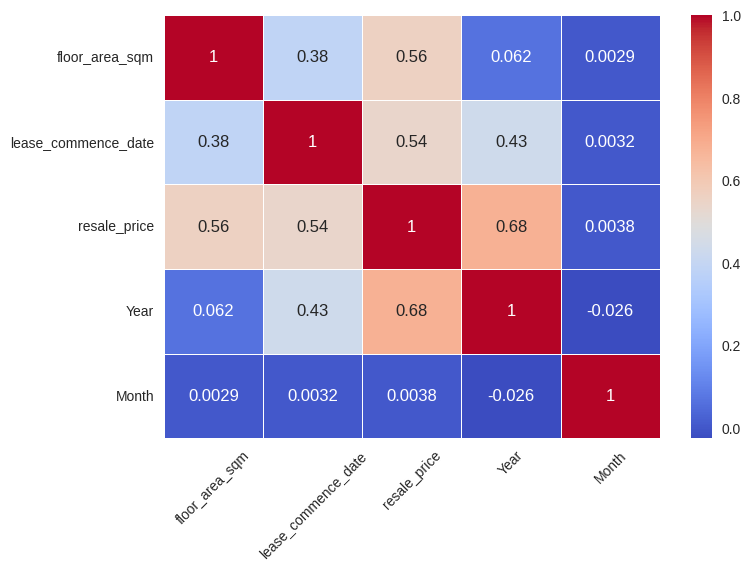

In [ ]:
sns.heatmap(df.select_dtypes(include=["int64","float64"]).corr(),annot=True,cmap="coolwarm",linewidths=.5)
plt.xticks(rotation=45)
plt.show()

<ipython-input-47-1ad24fa3249b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["flat_type"],palette="plasma")


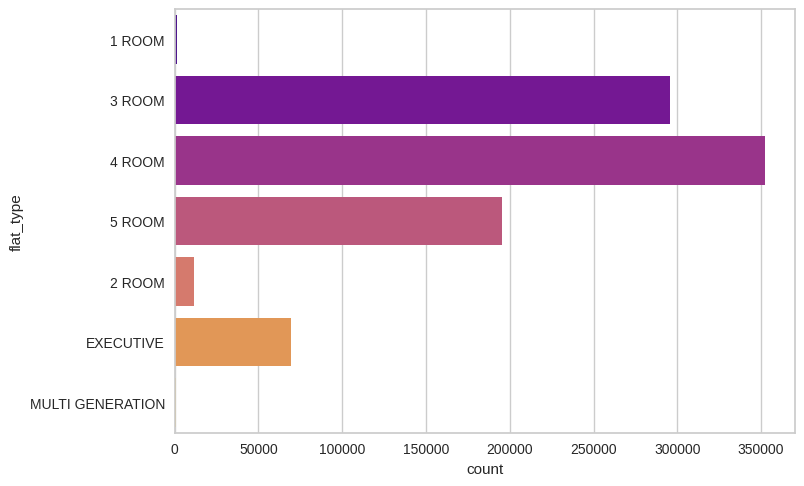

In [ ]:
sns.countplot(df["flat_type"],palette="plasma")
plt.show()

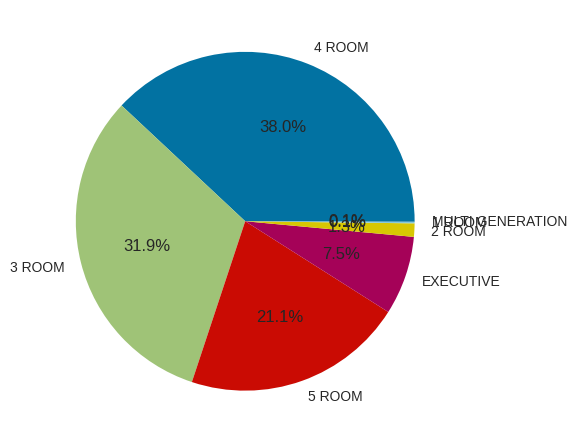

In [ ]:
plt.pie(df["flat_type"].value_counts(),labels=df["flat_type"].value_counts().index,autopct='%1.1f%%')
plt.show()

<ipython-input-49-364c49df5ca1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["town"],palette="plasma")


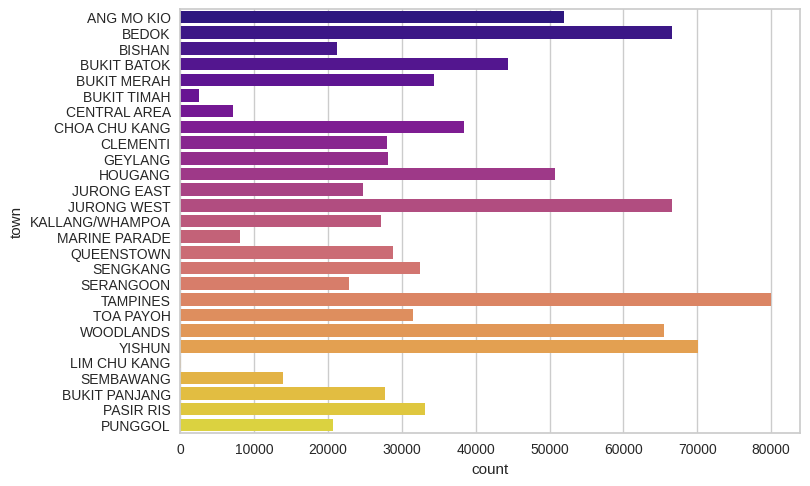

In [ ]:
sns.countplot(df["town"],palette="plasma")
plt.show()

<ipython-input-50-2fa5555e2896>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["flat_model"],palette="plasma")


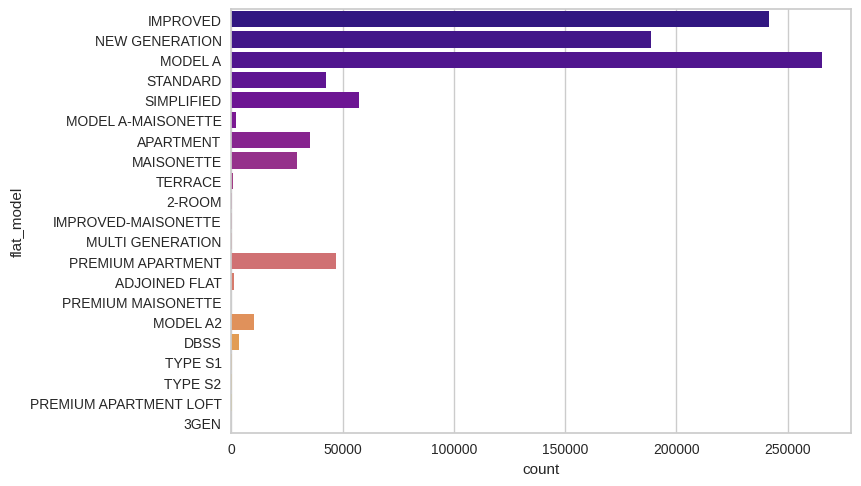

In [ ]:
sns.countplot(df["flat_model"],palette="plasma")
plt.show()

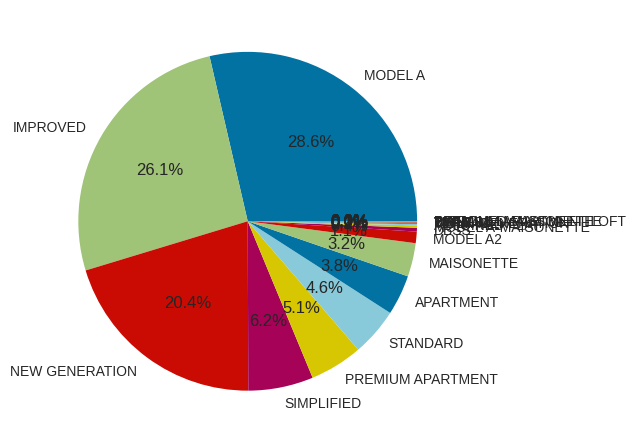

In [ ]:
plt.pie(df["flat_model"].value_counts(),labels=df["flat_model"].value_counts().index,autopct='%1.1f%%')
plt.show()

<ipython-input-52-2453f23d91e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["resale_price"])


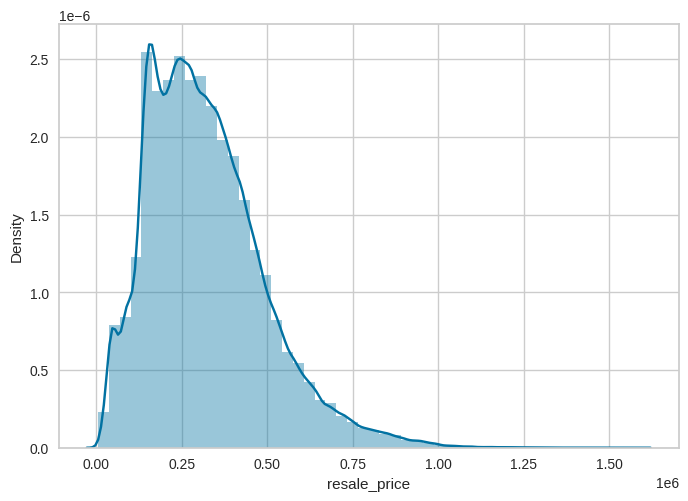

In [ ]:
sns.distplot(df["resale_price"])
plt.show()

<ipython-input-53-a8886dc42759>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["floor_area_sqm"])


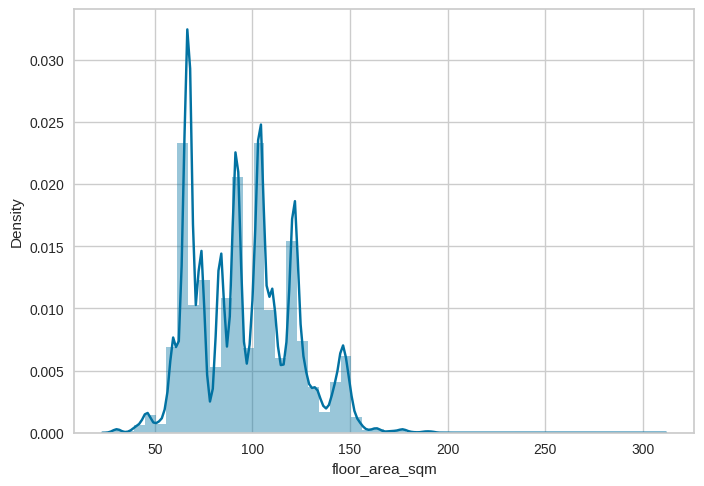

In [ ]:
sns.distplot(df["floor_area_sqm"])
plt.show()

<ipython-input-54-b393afa69577>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="Year",y="resale_price",palette="plasma")


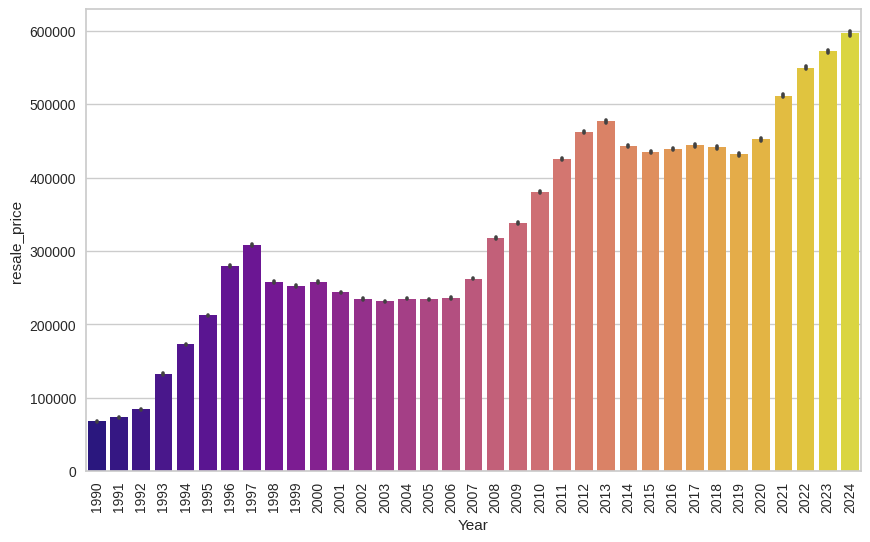

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="Year",y="resale_price",palette="plasma")
plt.xticks(rotation=90)
plt.show()

<ipython-input-55-54f249021943>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="flat_type",y="resale_price",palette="plasma")


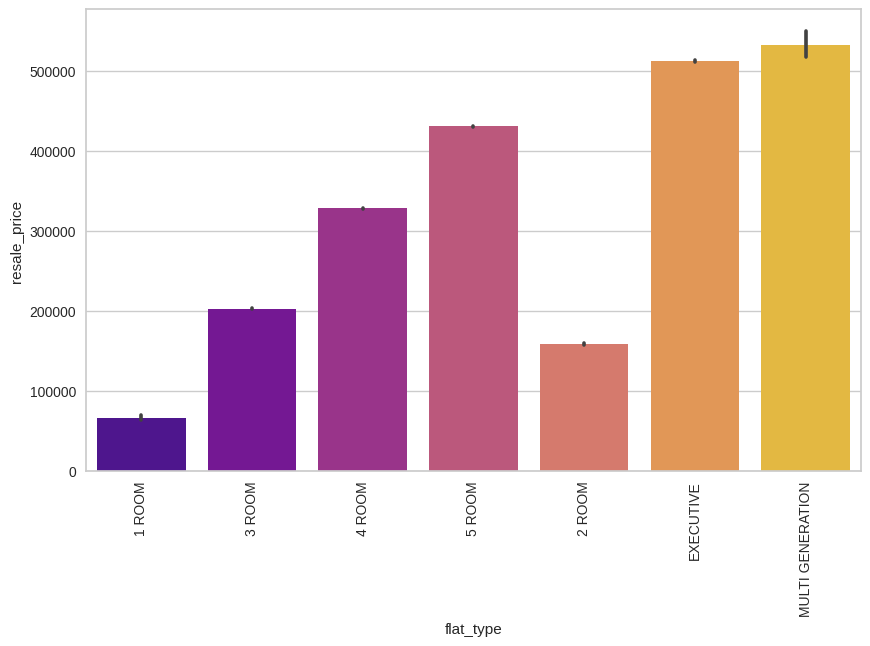

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="flat_type",y="resale_price",palette="plasma")
plt.xticks(rotation=90)
plt.show()

<ipython-input-56-98ee38a6a62c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="town",y="resale_price",palette="rainbow")


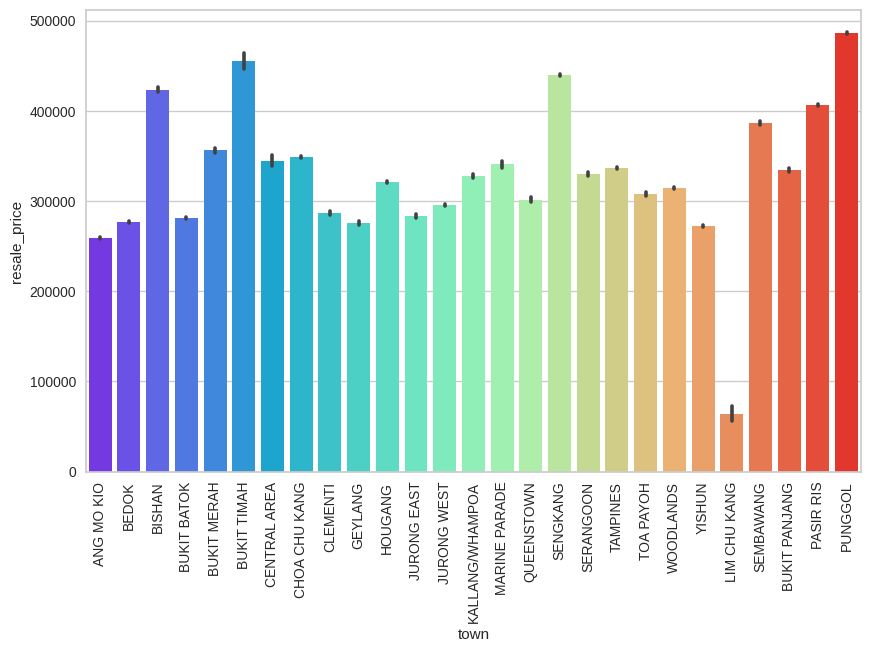

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="town",y="resale_price",palette="rainbow")
plt.xticks(rotation=90)
plt.show()

<ipython-input-57-ce509052b6a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="flat_model",y="resale_price",palette="plasma")


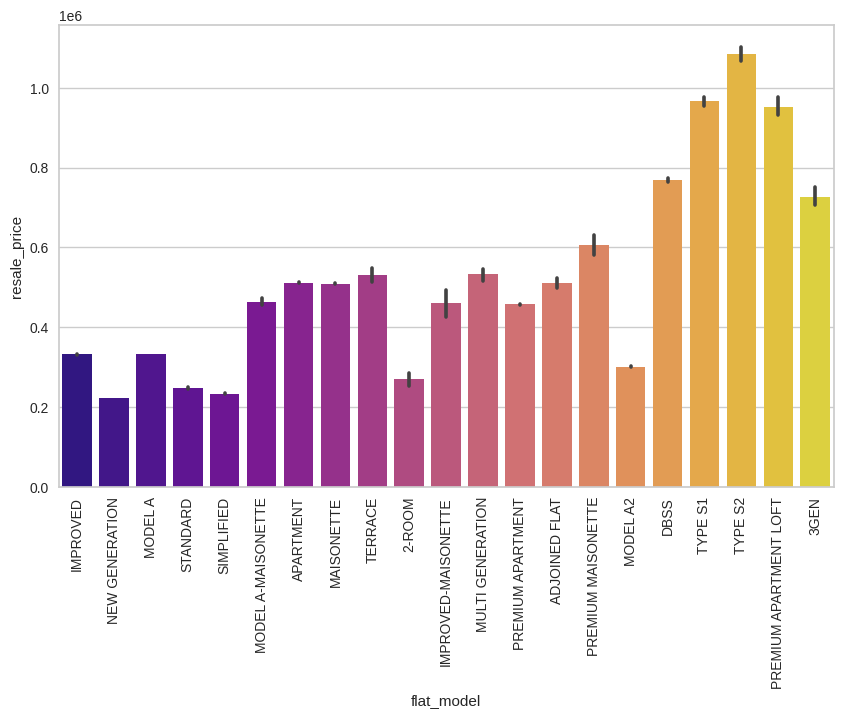

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="flat_model",y="resale_price",palette="plasma")
plt.xticks(rotation=90)
plt.show()

<ipython-input-58-6a1d6073ae18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="storey_range",y="resale_price",palette="plasma")


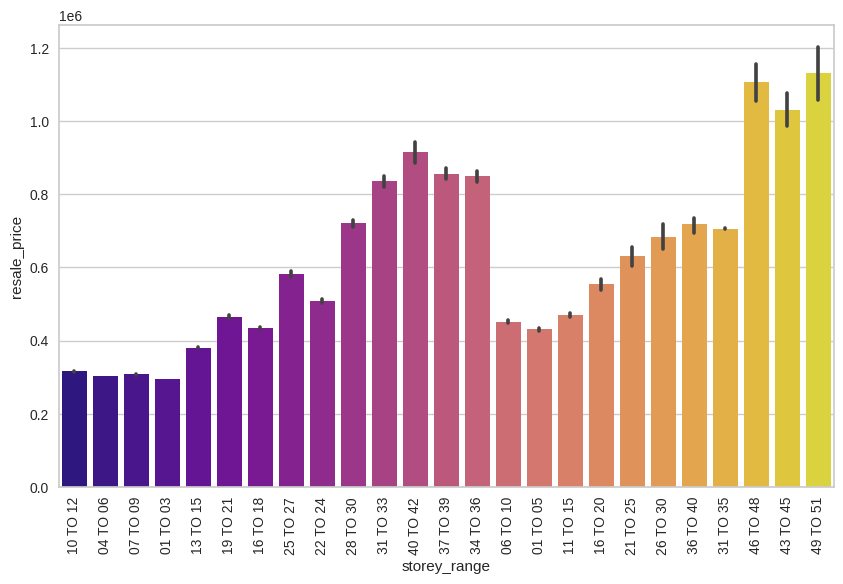

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="storey_range",y="resale_price",palette="plasma")
plt.xticks(rotation=90)
plt.show()

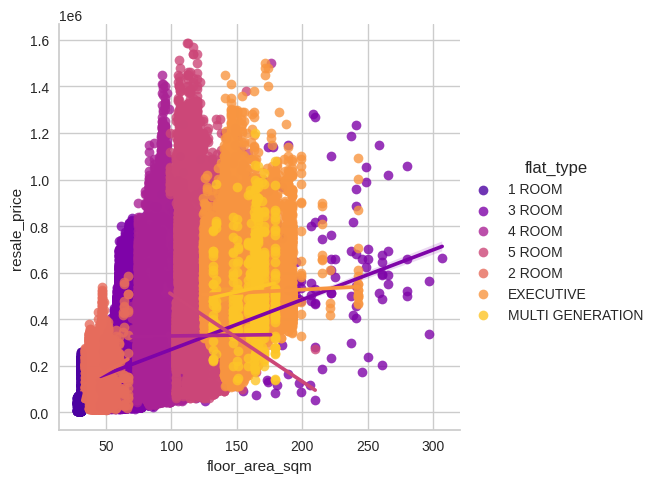

In [ ]:
sns.lmplot(data=df,x="floor_area_sqm",y="resale_price",hue="flat_type",palette="plasma")
plt.show()

<Figure size 1000x600 with 0 Axes>

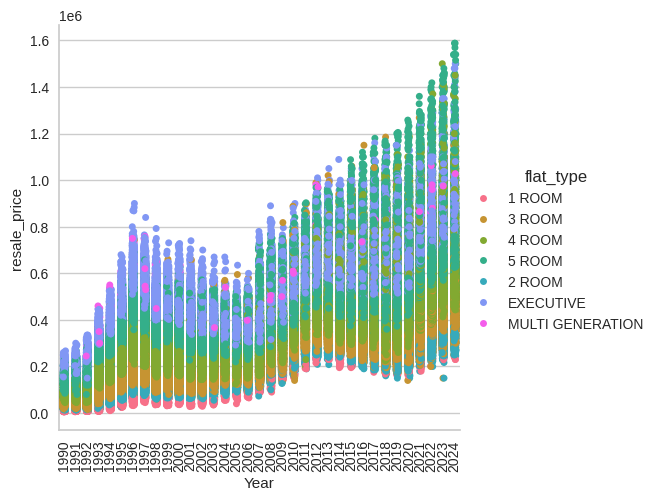

In [ ]:
plt.figure(figsize=(10,6))
sns.catplot(data = df, x = "Year" ,y = "resale_price", hue = "flat_type")
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

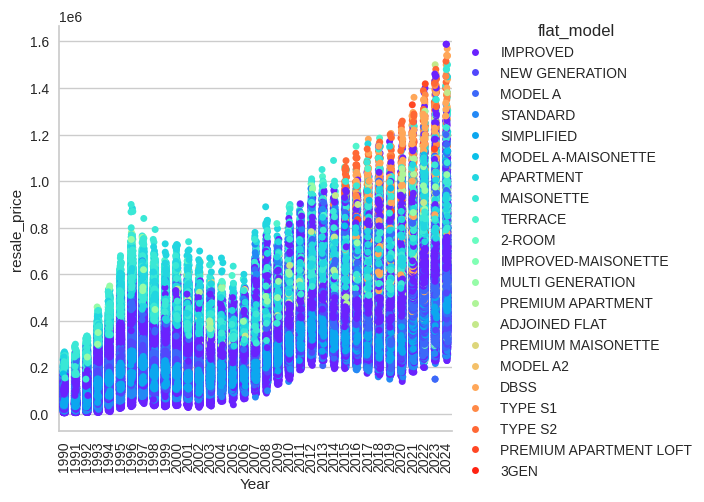

In [ ]:
plt.figure(figsize=(10,6))
sns.catplot(data = df,x = "Year" ,y = "resale_price", hue = "flat_model",palette="rainbow")
plt.xticks(rotation=90)
plt.show()

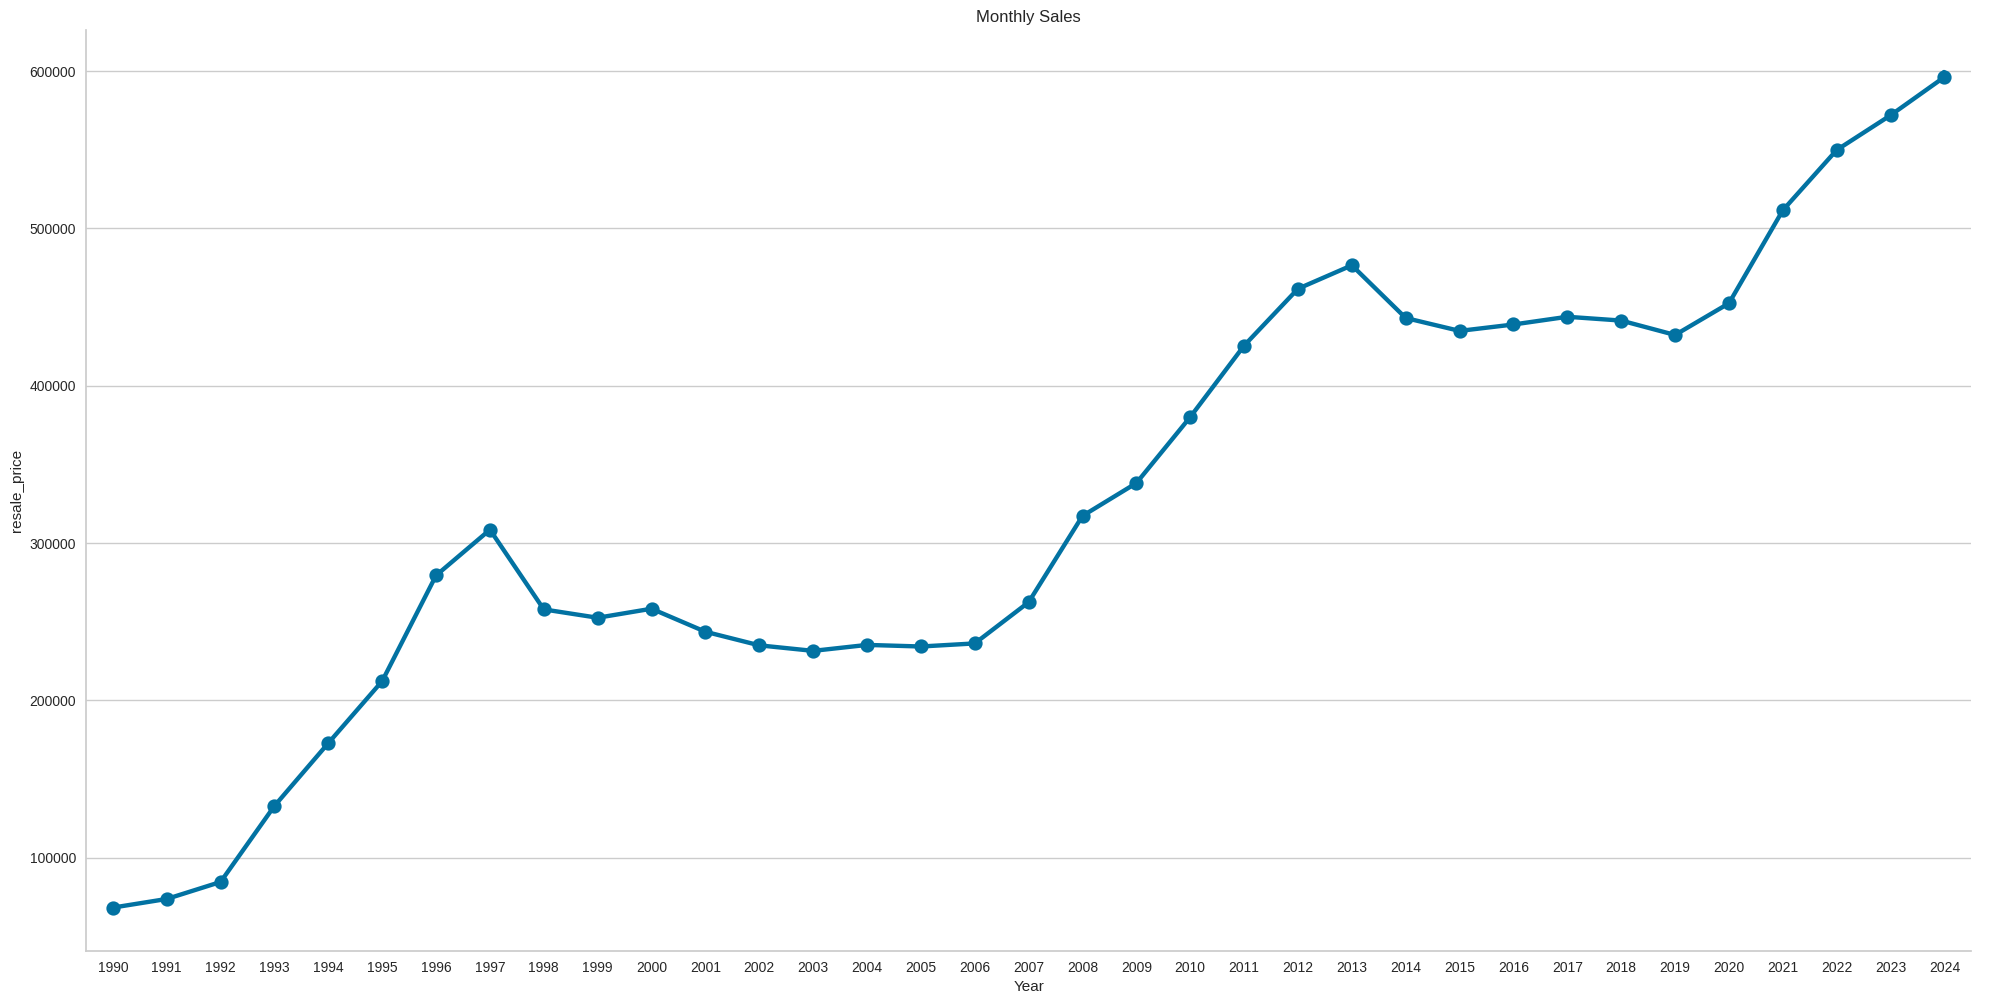

In [ ]:
sns.catplot(x="Year" ,y = "resale_price" , data=df, kind="point", aspect = 2, height=10)
plt.title("Monthly Sales")
plt.show()

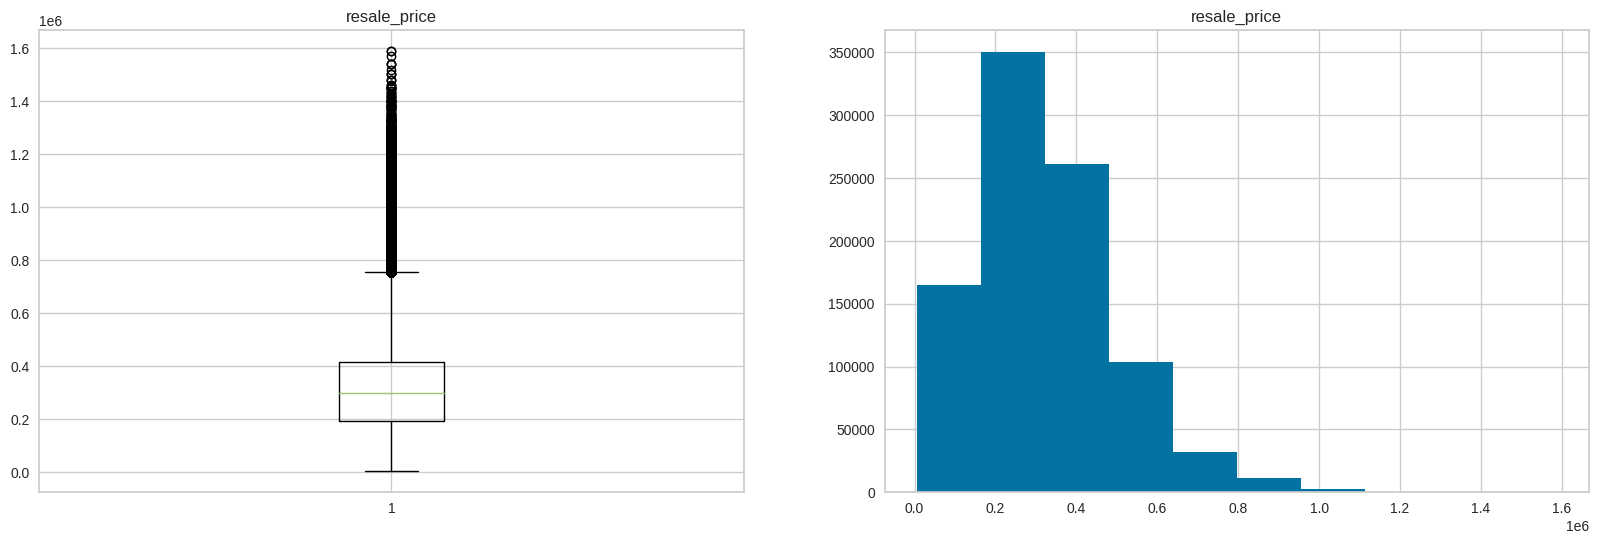

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))

ax1.boxplot(df["resale_price"])
ax1.set_title("resale_price")

ax2.hist(df["resale_price"])
ax2.set_title("resale_price")

plt.show()

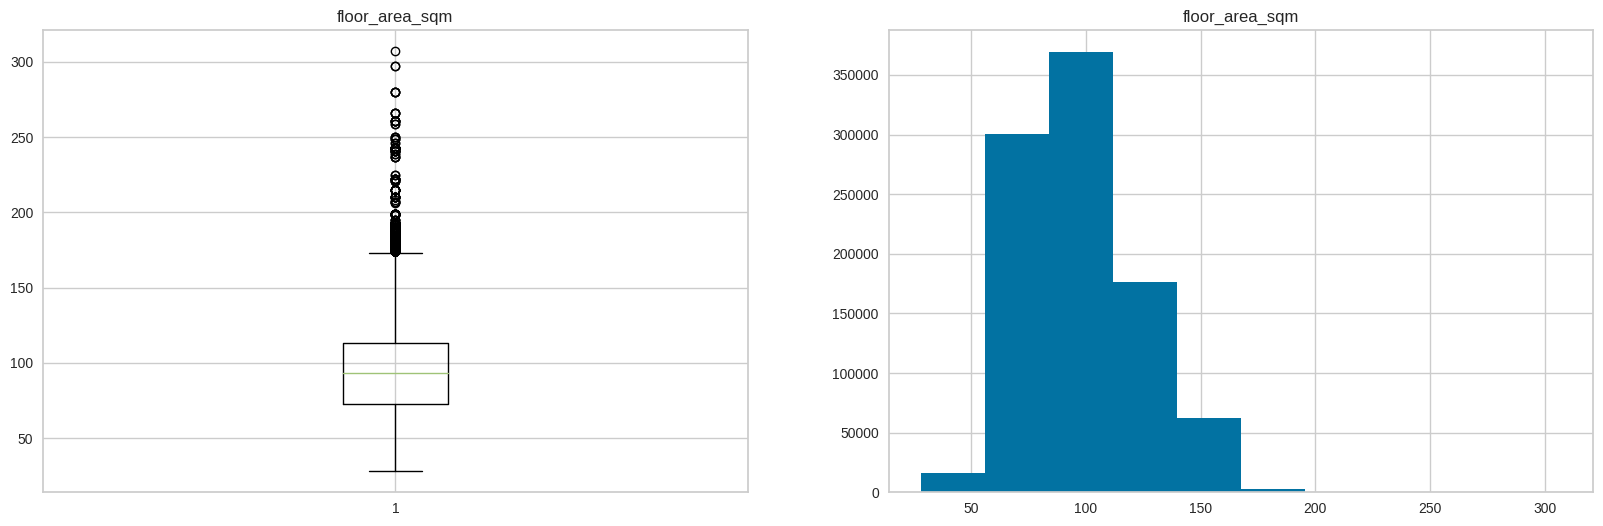

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))

ax1.boxplot(df["floor_area_sqm"])
ax1.set_title("floor_area_sqm")

ax2.hist(df["floor_area_sqm"])
ax2.set_title("floor_area_sqm")

plt.show()

In [ ]:
df[["floor_area_sqm", "resale_price"]].agg(["skew"]).transpose()

,skew
floor_area_sqm,0.365601
resale_price,0.947029


In [ ]:
def iqr(df, column_name):
    q1 = np.quantile(df[column_name], 0.25)
    q3 = np.quantile(df[column_name], 0.75)

    diff = q3 - q1
    lower_threshold  = q1 - (1.5 * diff)
    upper_threshold  = q3 + (1.5 * diff)

    print("Lower Threshold:", lower_threshold)
    print("Upper Threshold:", upper_threshold)
    # Identify rows outside the threshold range
    outliers = df[(df[column_name] < lower_threshold) | (df[column_name] > upper_threshold)]

    return len(outliers)

In [ ]:
outliers_floor_area = iqr(df, "floor_area_sqm")
print(f"Number of rows outside the IQR range: {outliers_floor_area}")

Lower Threshold: 13.0
Upper Threshold: 173.0
Number of rows outside the IQR range: 2406


In [ ]:
outliers_resale_price = iqr(df, "resale_price")
print(f"Number of rows outside the IQR range: {outliers_resale_price}")

Lower Threshold: -142280.0
Upper Threshold: 754168.0
Number of rows outside the IQR range: 19500


### **Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['town'] = encoder.fit_transform(df['town'])
df['flat_type'] = encoder.fit_transform(df['flat_type'])
df['block'] = encoder.fit_transform(df['block'])
df['storey_range'] = encoder.fit_transform(df['storey_range'])
df['street_name'] = encoder.fit_transform(df['street_name'])
df['flat_model'] = encoder.fit_transform(df['flat_model'])

In [ ]:
df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Year,Month
0,0,0,830,13,5,31.0,5,1977,9000.0,1990,1
1,0,0,830,13,2,31.0,5,1977,6000.0,1990,1
2,0,0,830,13,5,31.0,5,1977,8000.0,1990,1
3,0,0,830,13,4,31.0,5,1977,6000.0,1990,1
4,0,2,447,13,2,73.0,12,1976,47200.0,1990,1
...,...,...,...,...,...,...,...,...,...,...,...
182587,26,5,921,563,2,142.0,3,1988,850000.0,2024,6
182588,26,5,2150,573,5,146.0,7,1986,790000.0,2024,6
182589,26,5,2371,575,5,146.0,7,1988,1000000.0,2024,6
182590,26,5,2371,575,2,146.0,7,1988,1000000.0,2024,6


In [ ]:
df.skew()

town                  -0.086094
flat_type              0.387865
block                  0.256764
street_name            0.022848
storey_range           1.103804
floor_area_sqm         0.365601
flat_model             0.500499
lease_commence_date    0.648725
resale_price           0.947029
Year                   0.294079
Month                 -0.026945
dtype: float64

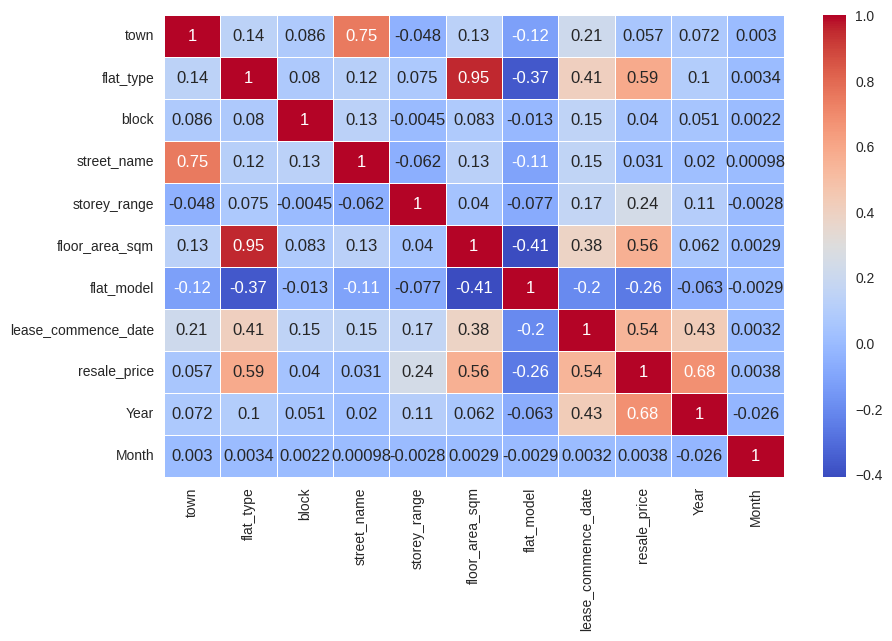

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linewidths=.5)
plt.show()

### **Feature Scaling**


Scaling is only done for linear regression. Tree-based models do not require scaling as it does not affect performance.

In [ ]:
scaler = StandardScaler()
scaler.fit(df.drop("resale_price",axis=1))
scaled_df = scaler.transform(df.drop("resale_price", axis=1))

In [ ]:
x = pd.DataFrame(scaled_df, columns=df.drop("resale_price", axis=1).columns)
y = df["resale_price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (741464, 10)
Shape of X_test: (185366, 10)
Shape of y_train: (741464,)
Shape of y_test: (185366,)


## **Modelling and Evaluation matrix**

In [ ]:
# evaluation_matrix

def evaluation_matrix(actual, pred):
  MAE = mean_absolute_error(actual, pred)
  MSE = mean_squared_error(actual, pred)
  RMSE = np.sqrt(mean_squared_error(actual, pred))
  SCORE = r2_score(actual, pred)
  return print("\n","r2_score:",SCORE , "\n","MAE:", MAE, "\n","MSE",MSE, "\n","RMSE", RMSE)

In [ ]:
# cross valadiation

def evaluate_model_cv(model, X, y, cv=10):
    cv_scores = cross_val_score(estimator=model, X=X, y=y, cv=cv)
    mean_cv_score = cv_scores.mean() # Calculate the mean scores
    return mean_cv_score

### **Implementing Supervised Machine Learning algorithms**

In [ ]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
LR_pred_train = LR_model.predict(X_train)
LR_pred_test = LR_model.predict(X_test)

In [ ]:
train_score_LR= LR_model.score(X_train,y_train)
test_score_LR= LR_model.score(X_test,y_test)

train_score_LR, test_score_LR

(0.7629149780526502, 0.7623778793078515)

### **HistGradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
hgb_model = HistGradientBoostingRegressor().fit(X_train,y_train)
y_pred_train = hgb_model.predict(X_train)
y_pred_test = hgb_model.predict(X_test)

In [ ]:
train_score_hgb= hgb_model.score(X_train,y_train)
test_score_hgb= hgb_model.score(X_test,y_test)

train_score_hgb, test_score_hgb

(0.965214231670212, 0.964717072504014)

In [ ]:
my_dist = {"Actual" : y_test , "Predict" : y_pred_test}
compare_hgb = pd.DataFrame(my_dist)
compare_hgb["diff"] = (compare_hgb["Actual"] - compare_hgb["Predict"]).abs()
compare_hgb.sample(10)

,Actual,Predict,diff
29701,385000.0,420664.209107,35664.209107
126315,304000.0,305297.699519,1297.699519
283073,251000.0,262131.150811,11131.150811
163360,236000.0,236059.906925,59.906925
39411,331000.0,359948.931459,28948.931459
278463,538000.0,449859.195774,88140.804226
240789,185000.0,189393.903520,4393.903520
128010,153000.0,185070.992158,32070.992158
52745,218000.0,225995.835105,7995.835105
225298,520000.0,561217.827871,41217.827871


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


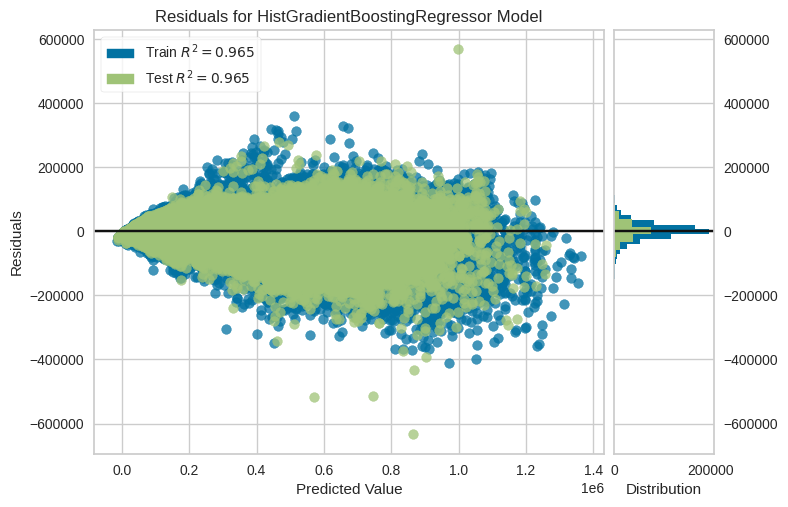

<Axes: title={'center': 'Residuals for HistGradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(hgb_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

### **XGBRegressor**

In [ ]:
xgb_model = xgboost.XGBRegressor().fit(X_train,y_train)
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

In [ ]:
train_score_xgb= xgb_model.score(X_train,y_train)
test_score_xgb= xgb_model.score(X_test,y_test)

train_score_xgb, test_score_xgb

(0.9799427622702367, 0.9790793926330597)

In [ ]:
evaluation_matrix(y_train, y_pred_train)


 r2_score: 0.9799427622702367 
 MAE: 17102.237445857 
 MSE 586085616.9355173 
 RMSE 24209.2052107358


In [ ]:
evaluation_matrix(y_test, y_pred_test)


 r2_score: 0.9790793926330597 
 MAE: 17304.130980023212 
 MSE 610474314.2225975 
 RMSE 24707.778415361376


In [ ]:
evaluation_matrix_cv = evaluate_model_cv(xgb_model, X_train, y_train)
evaluation_matrix_cv

0.9789799742260792

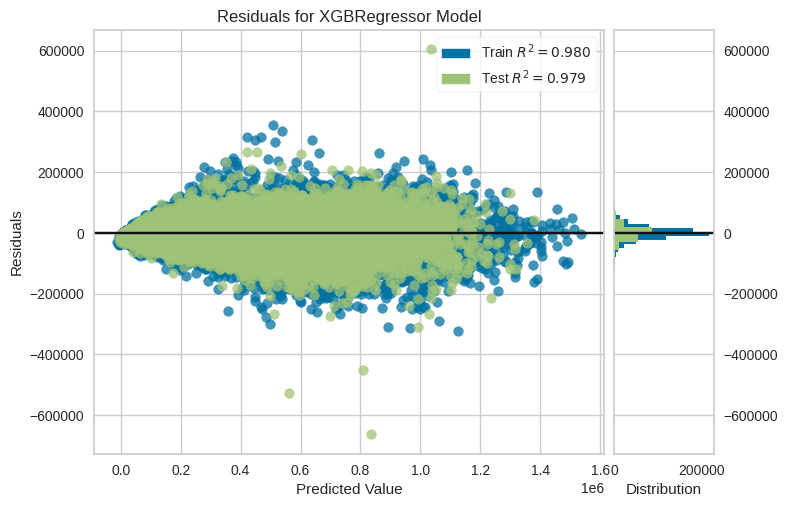

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(xgb_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

In [ ]:
my_dist = {"Actual" : y_test , "Predict" : y_pred_test}
compare_xgb = pd.DataFrame(my_dist)
compare_xgb["diff"] = (compare_xgb["Actual"] - compare_xgb["Predict"]).abs()
compare_xgb.sample(10)

,Actual,Predict,diff
6265,273000.0,278282.68750,5282.68750
120567,252000.0,258742.40625,6742.40625
119205,528000.0,520738.59375,7261.40625
145234,413000.0,386506.46875,26493.53125
103584,270000.0,292266.00000,22266.00000
179195,365000.0,369151.46875,4151.46875
94888,229000.0,253516.18750,24516.18750
233299,170000.0,179145.46875,9145.46875
230255,306000.0,322164.34375,16164.34375
100999,333000.0,323651.28125,9348.71875


### **DecisionTreeRegressor**

In [ ]:
DT_model = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_train = DT_model.predict(X_train)
y_pred_test = DT_model.predict(X_test)

In [ ]:
evaluation_matrix(y_train, y_pred_train)


 r2_score: 0.9998445891952287 
 MAE: 329.9093488480705 
 MSE 4541205.455109323 
 RMSE 2131.010430549162


In [ ]:
evaluation_matrix(y_test, y_pred_test)


 r2_score: 0.9692356406669751 
 MAE: 19624.58597536252 
 MSE 897720168.2970357 
 RMSE 29961.9787113107


In [ ]:
train_score_DT= DT_model.score(X_train,y_train)
test_score_DT= DT_model.score(X_test,y_test)

train_score_DT, test_score_DT

(0.9998445891952287, 0.9692356406669751)

### **RandomForestRegressor**

In [ ]:
# train Test split

X = df.drop("resale_price", axis=1)
y = df["resale_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (834147, 10)
Shape of X_test: (92683, 10)
Shape of y_train: (834147,)
Shape of y_test: (92683,)


In [ ]:
RF_model = RandomForestRegressor().fit(X_train,y_train)
y_pred_train = RF_model.predict(X_train)
y_pred_test = RF_model.predict(X_test)

In [ ]:
train_score_RF= RF_model.score(X_train,y_train)
test_score_RF= RF_model.score(X_test,y_test)

train_score_RF, test_score_RF

(0.9976391537558423, 0.9838484263467903)

In [ ]:
evaluation_matrix(y_train, y_pred_train)


 r2_score: 0.9976391537558423 
 MAE: 5512.198718430969 
 MSE 69012109.95430295 
 RMSE 8307.352764527515


In [ ]:
evaluation_matrix(y_test, y_pred_test)


 r2_score: 0.9838484263467903 
 MAE: 14398.252533181167 
 MSE 469011026.18049175 
 RMSE 21656.662397065982


In [ ]:
my_dist = {"Actual" : y_test , "Predict" : y_pred_test}
compare = pd.DataFrame(my_dist)
compare.sample(10)

,Actual,Predict
271327,350000.0,330825.000000
83938,503000.0,523200.000000
325287,245000.0,252250.000000
163640,180000.0,140120.000000
264892,145000.0,153141.214286
125646,180000.0,178497.666667
124727,315000.0,346280.000000
34840,310000.0,254810.000000
41637,350000.0,347231.000000
193438,225000.0,221420.000000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


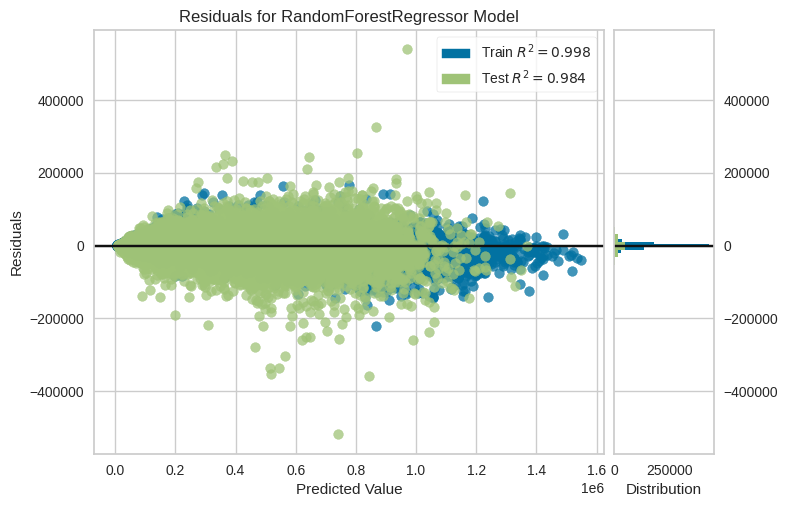

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
visualizer = ResidualsPlot(RF_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

### **Random Forest With Hyper Parameter Tuning**

In [ ]:
# from sklearn.model_selection import GridSearchCV

# RF_mod=RandomForestRegressor()

# params_grid = {
#           'n_estimators':[50,100,200,500],
#           'min_samples_split':[3,6,8],
#           'min_samples_leaf':[2,3,4],
#           'max_depth':[5,15,30]
#           }

# RF_grid_cv = GridSearchCV(estimator=RF_mod, param_grid=params_grid, verbose=True, cv=10, scoring= "r2")
# RF_grid_cv.fit(X_train, y_train)
# print("Best parameters :\n\n", RF_grid_cv.best_params_)
# print("\nCross Validation R\u00b2 score:\n\n", RF_grid_cv.best_score_.round(3))

In [ ]:
def feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
columns=X_train.columns

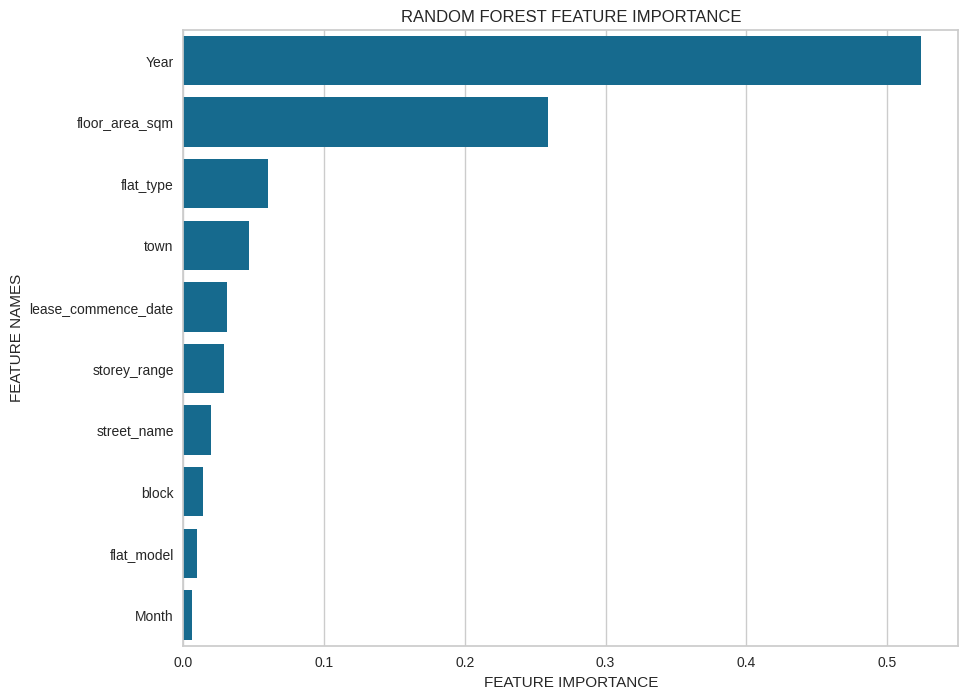

In [ ]:
feature_importance(RF_model.feature_importances_,columns[:],"RANDOM FOREST")

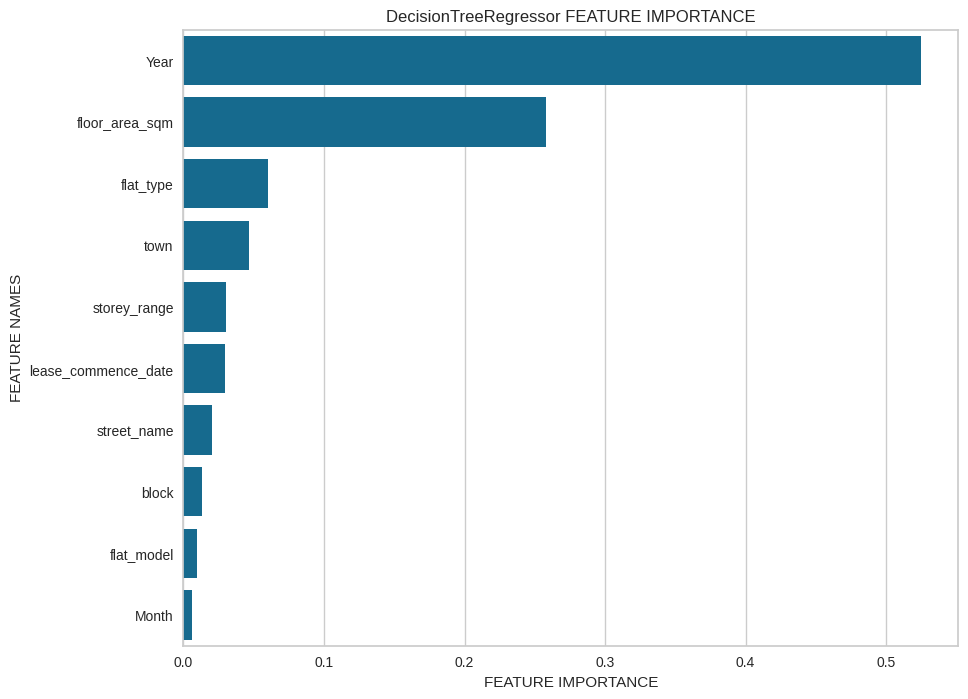

In [ ]:
feature_importance(DT_model.feature_importances_,columns[:],"DecisionTreeRegressor")

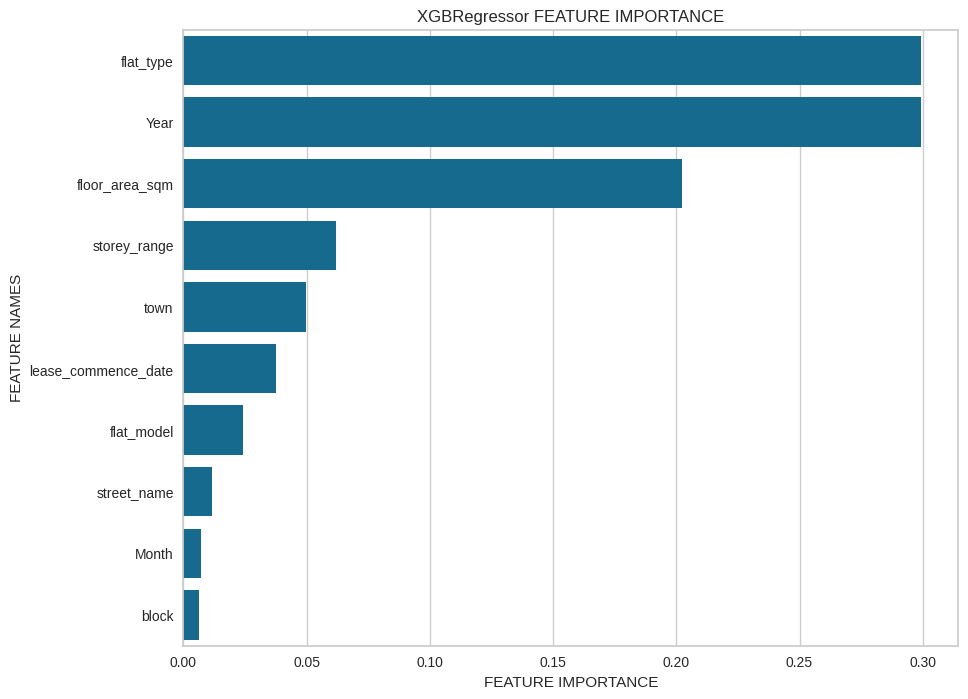

In [ ]:
feature_importance(xgb_model.feature_importances_,columns[:],"XGBRegressor")

In [ ]:
score_df = pd.DataFrame({"Train_Score" : [train_score_DT,train_score_hgb,train_score_LR,train_score_xgb,train_score_RF],
                         "Test_Score" : [test_score_DT,test_score_hgb,test_score_LR,test_score_xgb,test_score_RF]},
                        index = ["DecisionTreeRegressor","HistGradientBoostingRegressor","LinearRegression","XGBRegressor","RandomForestRegressor"])

In [ ]:
score_df

,Train_Score,Test_Score
DecisionTreeRegressor,0.999845,0.969236
HistGradientBoostingRegressor,0.965214,0.964717
LinearRegression,0.762915,0.762378
XGBRegressor,0.979943,0.979079
RandomForestRegressor,0.997639,0.983848


Given the new context with the "Train_Score" and "Test_Score," it’s clear we’re evaluating model performance based on both training and testing data.

### Scores Summary

1. **DecisionTreeRegressor**
   - Train Score: 0.999845
   - Test Score: 0.969005

2. **HistGradientBoostingRegressor**
   - Train Score: 0.965247
   - Test Score: 0.964733

3. **LinearRegression**
   - Train Score: 0.762915
   - Test Score: 0.762378

4. **XGBRegressor**
   - Train Score: 0.979943
   - Test Score: 0.979079

5. **RandomForestRegressor**
   - Train Score: 0.997628
   - Test Score: 0.983775

### Analysis

1. **Highest Test Score**: The **RandomForestRegressor** has the highest test score (0.983775), which indicates the best performance on unseen data among these models.

2. **Best Balance Between Train and Test Scores**:
   - **XGBRegressor** has a high test score (0.979079) with a strong train score (0.979943). This suggests it performs well on both the training and test data, indicating a good balance between fitting and generalization.
   - **HistGradientBoostingRegressor** also shows a high balance with similar train and test scores (0.965247 and 0.964733), though slightly lower than XGBRegressor.

3. **Potential Overfitting**:
   - **DecisionTreeRegressor** has an exceptionally high train score (0.999845) compared to its test score (0.969005). This large gap indicates potential overfitting, where the model performs exceptionally well on training data but less well on new, unseen data.
   - **RandomForestRegressor** shows a relatively small gap between train (0.997628) and test scores (0.983775), suggesting it is less prone to overfitting compared to the DecisionTreeRegressor.

1. **Best Overall Performance**:
   - **RandomForestRegressor** is the best choice if you prioritize performance on unseen data, as it has the highest test score and a good balance between training and test scores.

2. **Best Balance of Performance and Generalization**:
   - **XGBRegressor** is also a strong candidate with high scores on both training and test data, offering a good balance between performance and generalization.

3. **For Robustness**:
   - **HistGradientBoostingRegressor** is a solid choice with balanced scores, though slightly lower than the RandomForestRegressor and XGBRegressor.

In conclusion, for the best performance on test data, **RandomForestRegressor** is recommended. For a good balance of performance on both training and test data, **XGBRegressor** is also an excellent choice.